## SyriaTel Exploratory Data Analysis
* The dataset can be found [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,6)


In [3]:

data = pd.read_csv('tel_data.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* No null values
* Column data types are representative of the data in the columns

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
data.duplicated().sum()

0

* No duplicates

In [7]:
#categorical columns
cat_cols = ['area code','international plan','voice mail plan','customer service calls']
for col in cat_cols:
    print(col)
    print(data[col].value_counts())

area code
415    1655
510     840
408     838
Name: area code, dtype: int64
international plan
no     3010
yes     323
Name: international plan, dtype: int64
voice mail plan
no     2411
yes     922
Name: voice mail plan, dtype: int64
customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


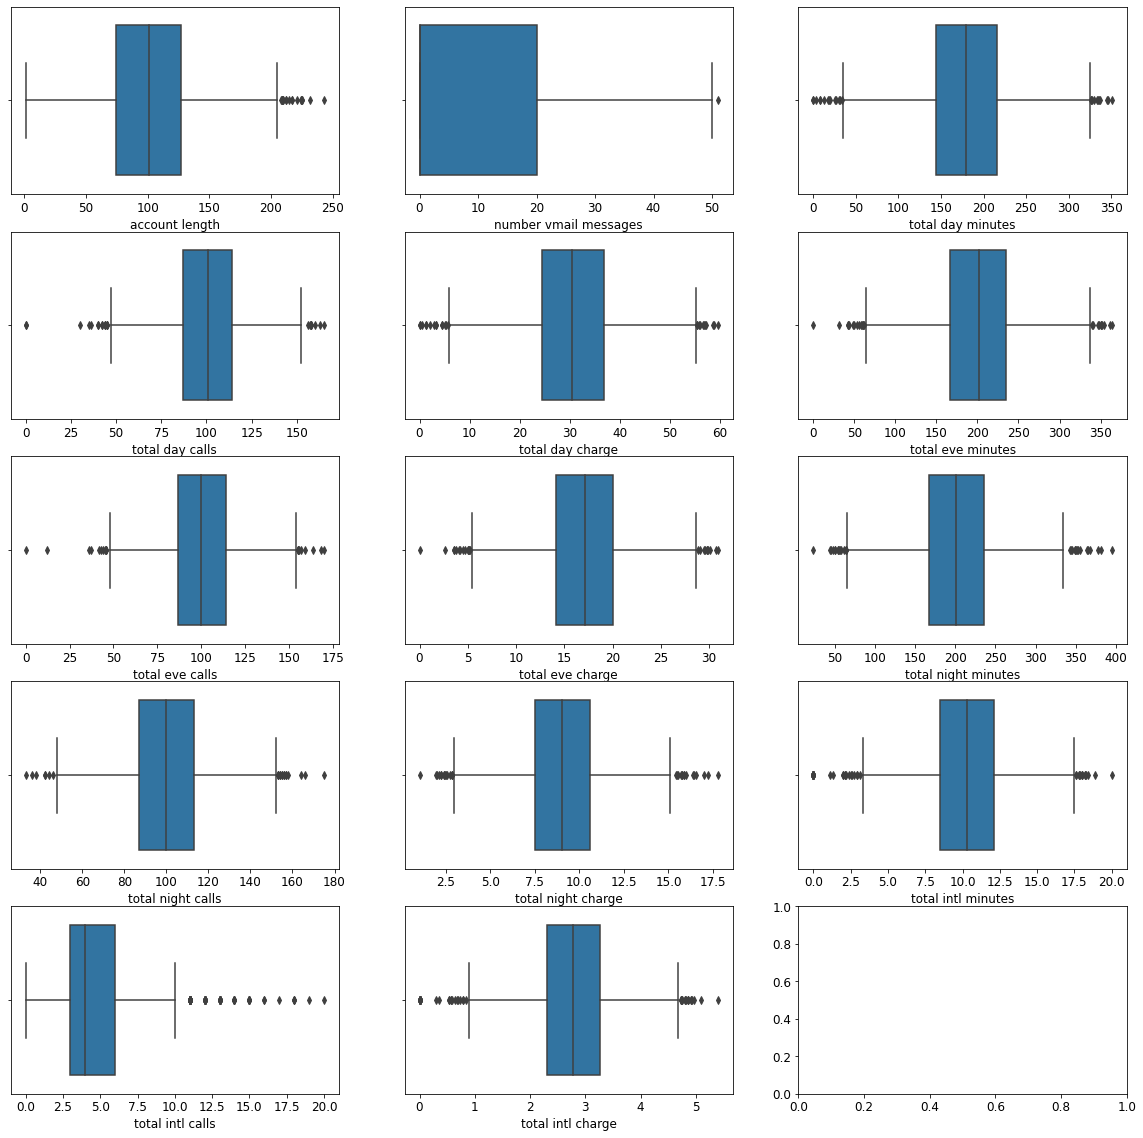

In [8]:
# checking for outliers
#numeric_cols =(data.select_dtypes(['int64','float64'])).columns
numeric_cols =['account length','number vmail messages','total day minutes','total day calls','total day charge',\
                 'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',\
                 'total night charge','total intl minutes','total intl calls','total intl charge']


fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,20))
for idx,column in enumerate(numeric_cols):
    i = idx // 3
    j = idx % 3
    sns.boxplot(x = column, ax=ax[i,j], data = data)

* There aren't really concerning outliers even though the individual columns look like they have outliers. If you compare similar columns e.g (total night calls,total night minutes and total night charge)
they have the same pattern of outliers meaning thattogether they are not ouliers. Same for columns like (total eve calls,total eve charge,total eve minutes) 

In [9]:

data['voice mail plan']= data['voice mail plan'].map({'yes':1, 'no':0}).astype(int)
data['international plan']= data['international plan'].map({'yes':1, 'no':0}).astype(int)

In [10]:
#Distribution of the target column

data['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

* From the data, 85% of the people did not churn

### EDA

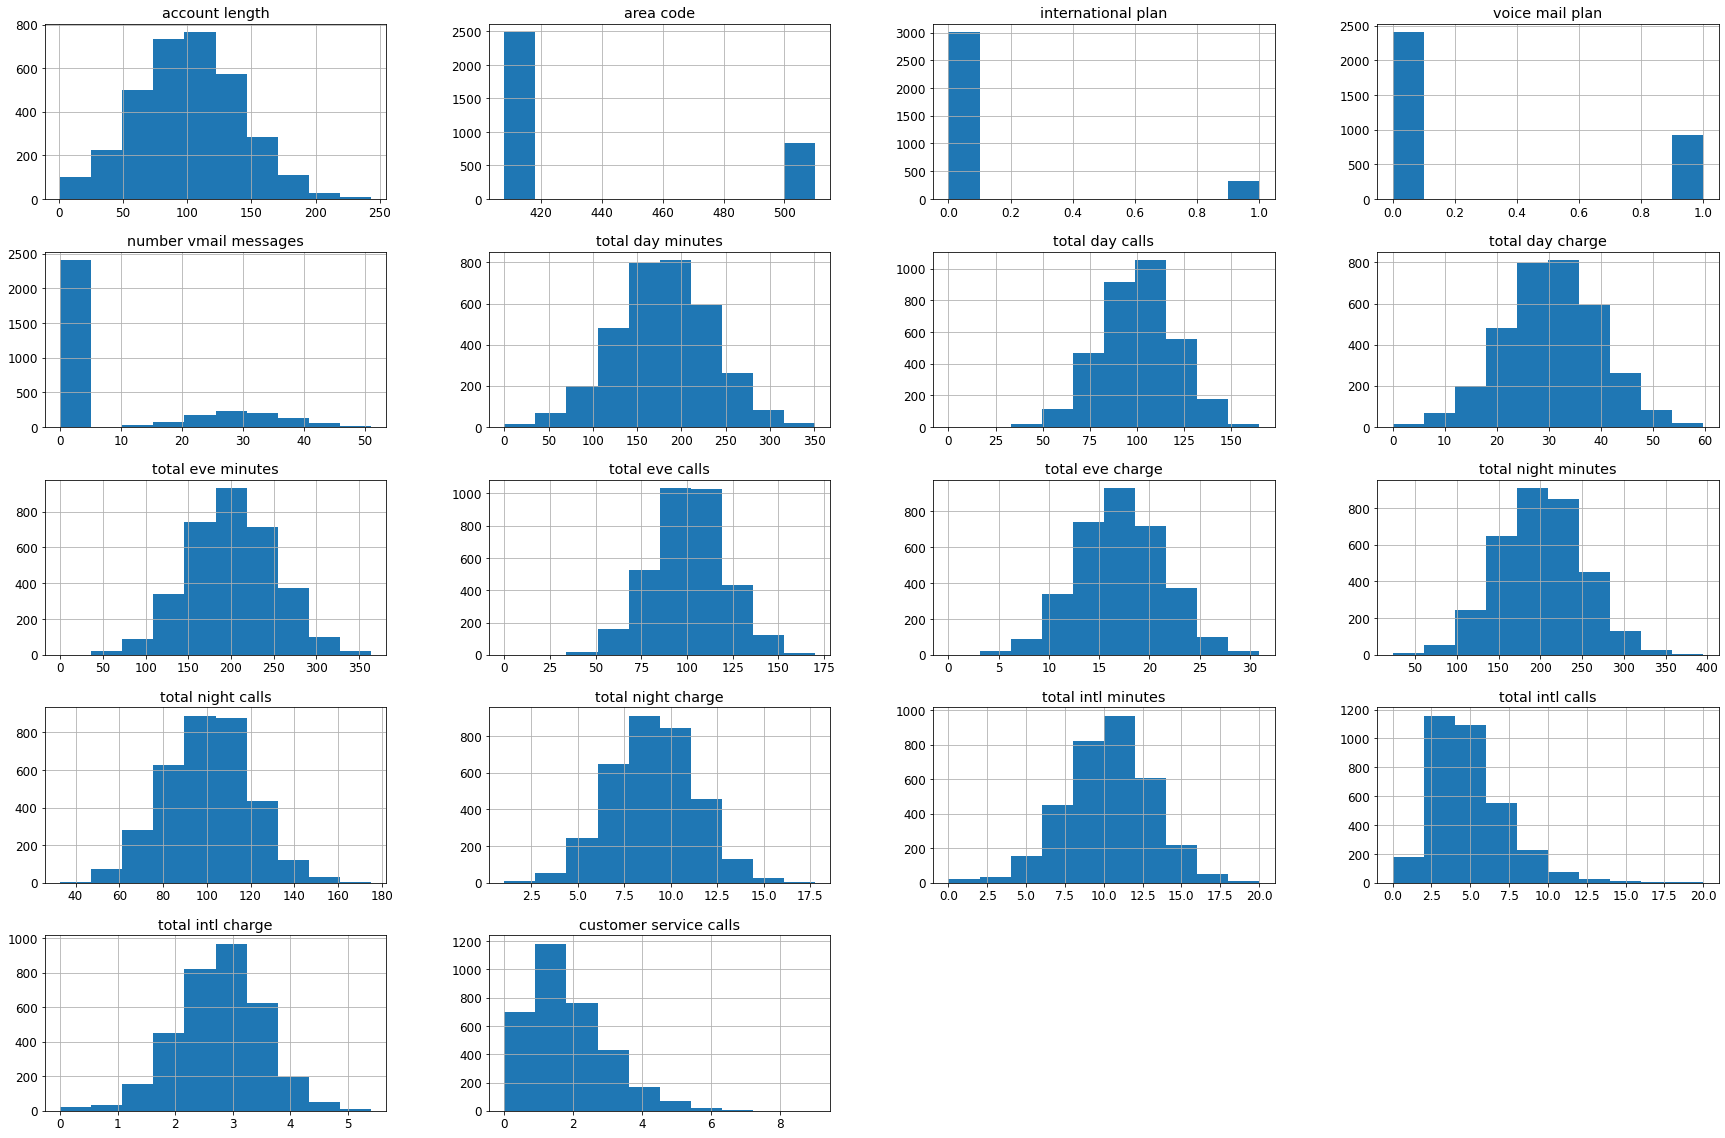

In [11]:
# Distribution of the different columns
data.hist(figsize =(30,20))
plt.show()

* Most of the columns have a fairly normal distribution, except number vmail messages, total intl calls and customer service calls

#### I will check if there is a difference in those who churned and those who didn't with respect to account length(number of days the person has been with the telco provider) 

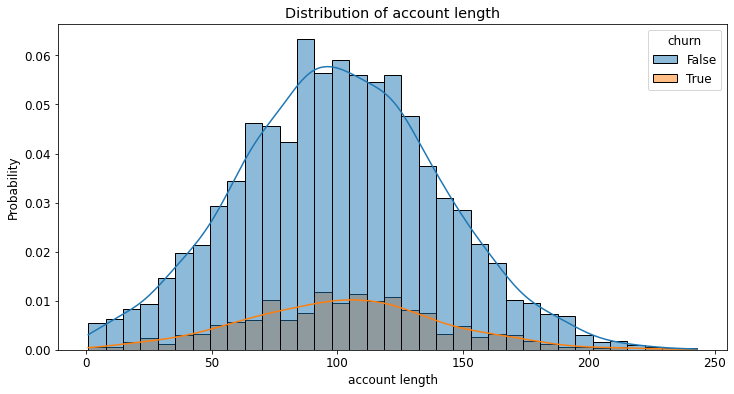

In [12]:
sns.histplot(x ='account length', hue='churn', kde=True, stat='probability', data = data )
plt.title('Distribution of account length')
#plt.savefig('account length')
plt.show()

* The account length does not seem to have a clear trend on whether a customer churns or not. Both have a fairly equal normal distribution

 #### Checking the relationship between the normal calls and the normal charges

In [13]:
df = data.copy()

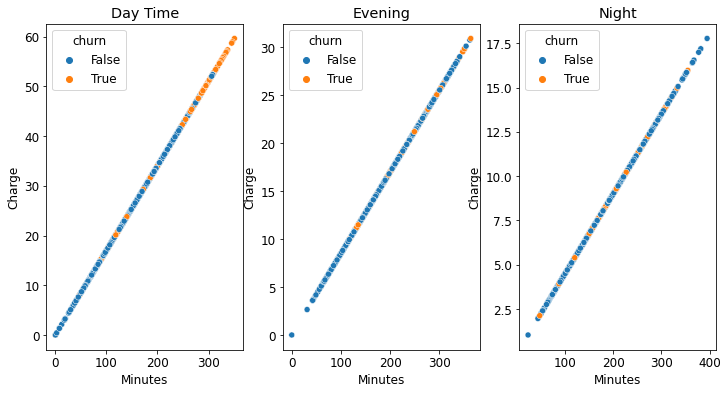

In [14]:
#plotting for total normal calls vs total charges in the day,evening and night time

fig, ax = plt.subplots(ncols = 3)

sns.scatterplot(x= 'total day minutes', y ='total day charge', hue ='churn', ax = ax[0], data = df)
ax[0].set_title('Day Time')
ax[0].set_ylabel('Charge')
ax[0].set_xlabel('Minutes')
sns.scatterplot(x= 'total eve minutes', y ='total eve charge', hue ='churn', ax =ax[1], data = df)
ax[1].set_title('Evening')
ax[1].set_ylabel('Charge')
ax[1].set_xlabel('Minutes')
sns.scatterplot(x= 'total night minutes', y ='total night charge',hue ='churn', ax =ax[2], data = df)
ax[2].set_title('Night')
ax[2].set_ylabel('Charge')
ax[2].set_xlabel('Minutes')
plt.savefig('calls vs charges')
plt.show()

* The charges are perfectly correlated with the minutes. However, the charges change as the day changes, it gets more expensive as the day goes by. The total charge for 300 minutes in the day time is almost 60, while in the evening its almost 30 and at night, its around 12.5

* It seems that there is a high probability of churning from the day time data, especially when the charges go over 42
during the day

#### Given the number of minutes, is there an  area code that receives better charges than others?

In [15]:
#there are three different areas codes( 408,415,510)
area_408 = df[df['area code'] == 408]
area_415 = df[df['area code'] == 415]
area_510 = df[df['area code'] == 510]

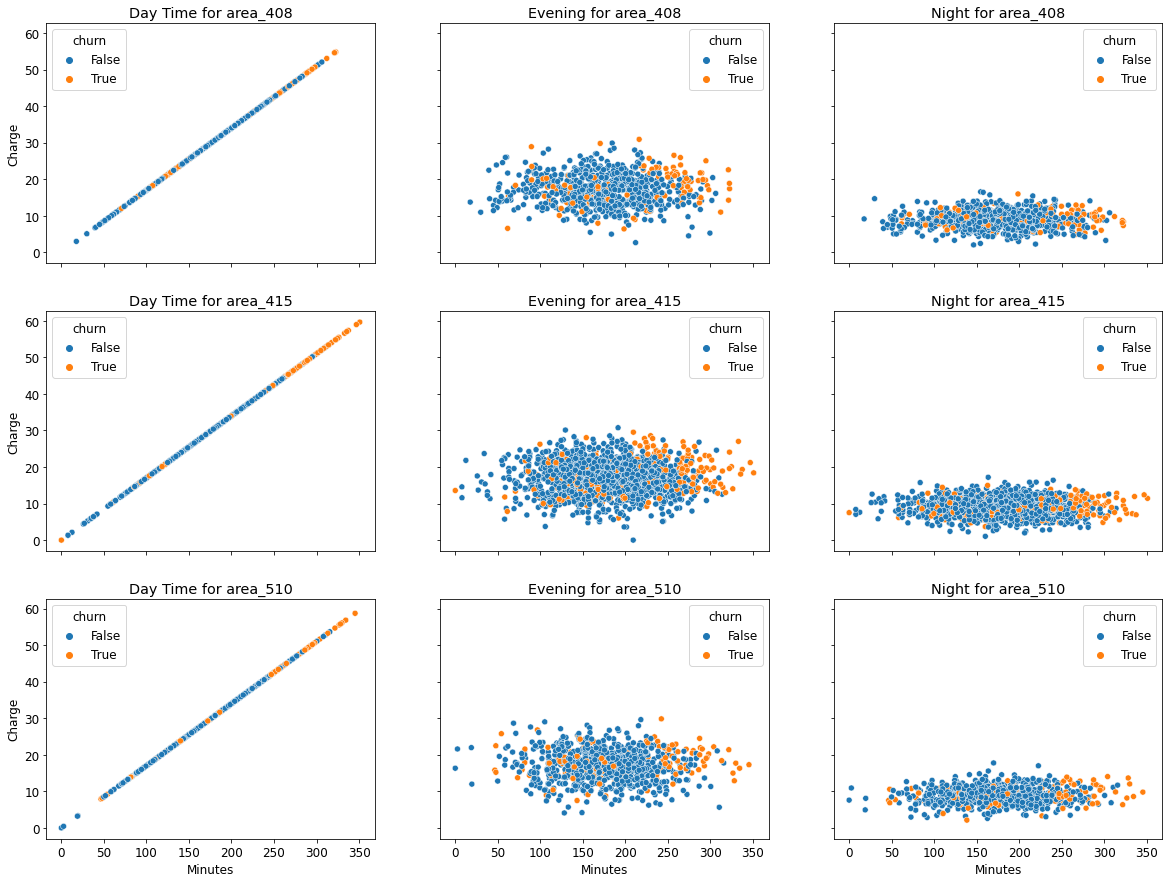

In [16]:
# plot for number of minutes against charges for day,evening,and night for each area code
fig, ax = plt.subplots(nrows = 3,ncols = 3, figsize = (20,15),sharex= True, sharey=True)
areas = ['area_408', 'area_415', 'area_510']
the_dfs = [area_408, area_415, area_510]
for idx, val in enumerate(the_dfs):
    sns.scatterplot(x= 'total day minutes', y ='total day charge', hue ='churn', ax = ax[idx,0], data = val )
    ax[idx,0].set_title('Day Time for {}'.format(areas[idx]))
    ax[idx,0].set_ylabel('Charge')
    ax[idx,0].set_xlabel('Minutes')
    sns.scatterplot(x= 'total day minutes', y ='total eve charge', hue ='churn', ax =ax[idx,1], data = val)
    ax[idx,1].set_title('Evening for {}'.format(areas[idx]))
    ax[idx,1].set_ylabel('Charge')
    ax[idx,1].set_xlabel('Minutes')
    sns.scatterplot(x= 'total day minutes', y ='total night charge',hue ='churn', ax =ax[idx,2], data = val)
    ax[idx,2].set_title('Night for {}'.format(areas[idx]))
    ax[idx,2].set_ylabel('Charge')
    ax[idx,2].set_xlabel('Minutes')
plt.savefig('area code vs charges')
plt.show()

* In all area codes, its only during day time where the charges are perfectly linear to minutes, unlike other times. It could be that they run promotions from evening to night or have different rates for those times.However , one thing is clear, the probability of churning in all area codes increases if minutes go beyond 250, even during the evening and night. Maybe the company can have a reward program for clients that have hit 250 minutes to try and retain them


In [17]:
# Lets check if there is a difference in the voice mail plans for those who have used under 250 minutes and those over 250 minutes

In [18]:
# dataframe for under 250 minutes
under250_minutes = df[(df['total day minutes']<=250) | (df['total eve minutes']<=250) 
                      | (df['total night minutes']<=250)]

# voice mail plan for under 250 minutes
under250_voicemail = under250_minutes['voice mail plan'].value_counts(normalize = True)


#dataframe for over 250 minutes
over250_minutes = df[(df['total day minutes']>250) | (df['total eve minutes']>250) |
                     (df['total night minutes']>250)]

#voice mail plan for over 250 minutes
over250_voicemail = over250_minutes['voice mail plan'].value_counts(normalize = True)

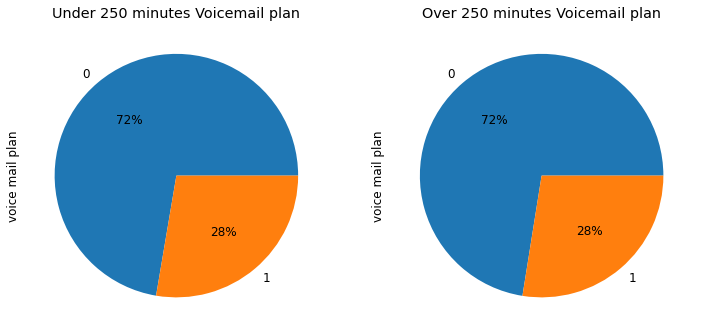

In [19]:
# plot for voice mail plans for over 250 minutes and under 250 minutes
fig,ax = plt.subplots(ncols = 2)
under250_voicemail.plot(kind='pie',autopct='%1.0f%%', ax = ax[0])
ax[0].set_title ('Under 250 minutes Voicemail plan')
over250_voicemail.plot(kind='pie',autopct='%1.0f%%', ax = ax[1])
ax[1].set_title ('Over 250 minutes Voicemail plan')
#plt.savefig('voice plan overall')
plt.show()

* Both groups had an equal number who had a voice mail plan

#### Lets now see the number of voice mail messages sent by these two groups 

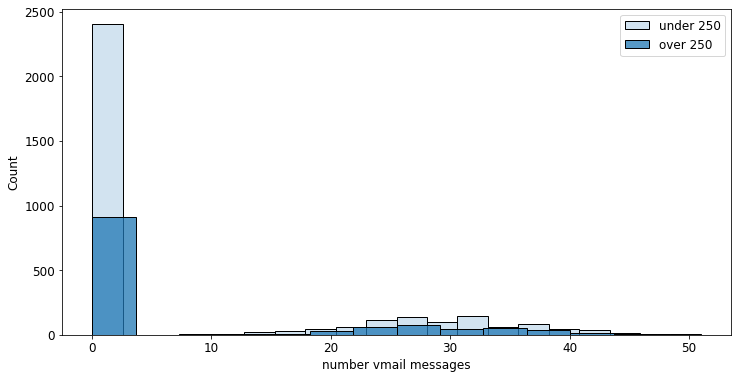

In [20]:
#plot for number of voice mail messages sent by those who had under 250 and over 250 minutes talk time
sns.histplot(x='number vmail messages', data = under250_minutes, alpha=0.2, label ='under 250')
sns.histplot(x='number vmail messages', data = over250_minutes,label ='over 250')
plt.legend()
#plt.savefig('voice messages sent')
plt.show()

* Those who spent less than 250 minutes sent more voice mail messages. Could be the reason why their talking time was less. If that is the case, the company should sensitive people on the importance of voice mail messages, as it could save their voice calls and end up saving the amount of money they spend, and that could lead to customer retention

#### 2. How is the distribution of individual number of  calls[total day calls+total eve calls+total night calls] by area code?

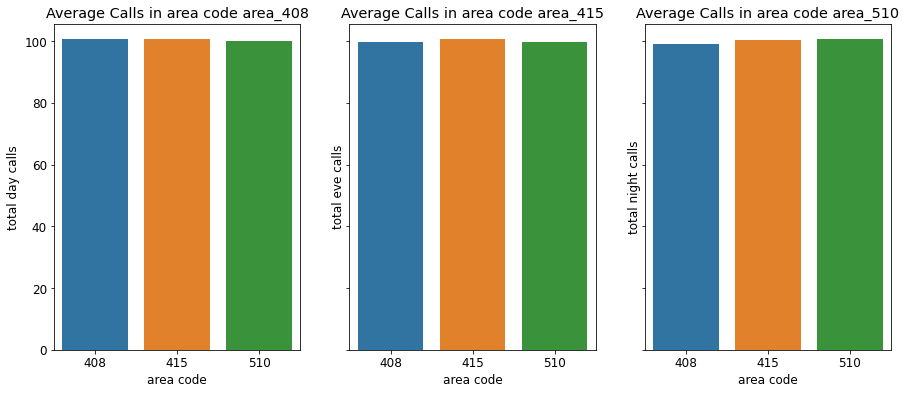

In [21]:
# distribution of calls by area code

fig,ax = plt.subplots(ncols = 3, figsize=(15,6), sharey=True)
cols = ['total day calls','total eve calls','total night calls' ]
all_calls = df[['total day calls','total eve calls','total night calls','churn','area code']]
for idx,val in enumerate(cols):
    sns.barplot(x ='area code', y = val, data = all_calls,ax = ax[idx], ci = None )
    ax[idx].set_title('Average Calls in area code {}'.format(areas[idx]))

plt.show()

* There is no notable difference in the average number of calls in the different area codes and at different times of the day

#### which states  brought in the  highest amount of money(total charge) and which brought the  least?

In [22]:
len(df.state.value_counts()) # there are 51 states in the data

51

In [23]:
# combine day,evening and night charges into one charge(all_charges)
df['all_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
state_charges = df.groupby('state')['all_charges'].mean().sort_values(ascending = False)


In [24]:
#top 5 states in average total charges
high_states= list(state_charges[:5].index)
high_charge_states = df[df['state'].isin (high_states)]

#mid 5 states in average total charges
mid_states= list(state_charges[25:30].index)
mid_charge_states = df[df['state'].isin (mid_states)]

#bottom 5 states in average total charges
low_states = list(state_charges[46:].index)
low_charge_states = df[df['state'].isin (low_states)]



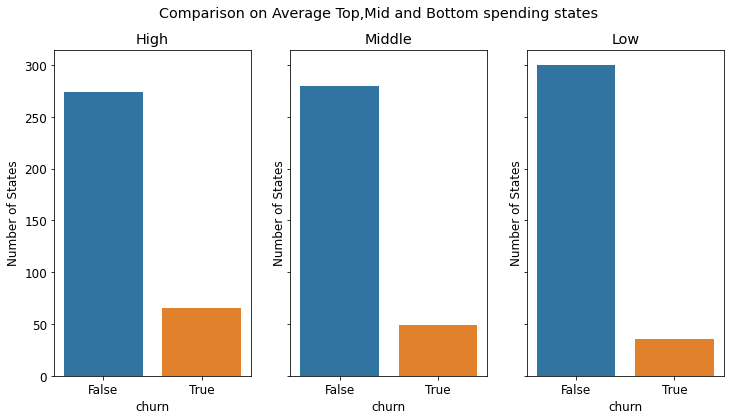

In [25]:
# plot to see the rate of churning from all states in top,mid and low spenders
fig, ax = plt.subplots(ncols = 3, sharey= True)
fig.suptitle('Comparison on Average Top,Mid and Bottom spending states')
sns.countplot(x = 'churn',ax=ax[0], data = high_charge_states)
ax[0].set_title('High')
ax[0].set_ylabel('Number of States')
sns.countplot(x = 'churn',ax=ax[1], data = mid_charge_states)
ax[1].set_title('Middle')
ax[1].set_ylabel('Number of States')
sns.countplot(x = 'churn',ax=ax[2], data = low_charge_states)
ax[2].set_title('Low')
ax[2].set_ylabel('Number of States')
#plt.savefig('states vs charges')
plt.show()

In [26]:
high_charge_states.churn.value_counts(normalize = True)

False    0.80826
True     0.19174
Name: churn, dtype: float64

In [27]:
mid_charge_states.churn.value_counts(normalize = True)

False    0.851064
True     0.148936
Name: churn, dtype: float64

In [28]:
low_charge_states.churn.value_counts(normalize = True)

False    0.892857
True     0.107143
Name: churn, dtype: float64

* From the chart and calculations below the chart, it's evident that people in the states that were spending more on average were more likely to churn. Those spending low amounts tended to be more loyal to the company

#### Let us now check those states who are high,middle and low spenders

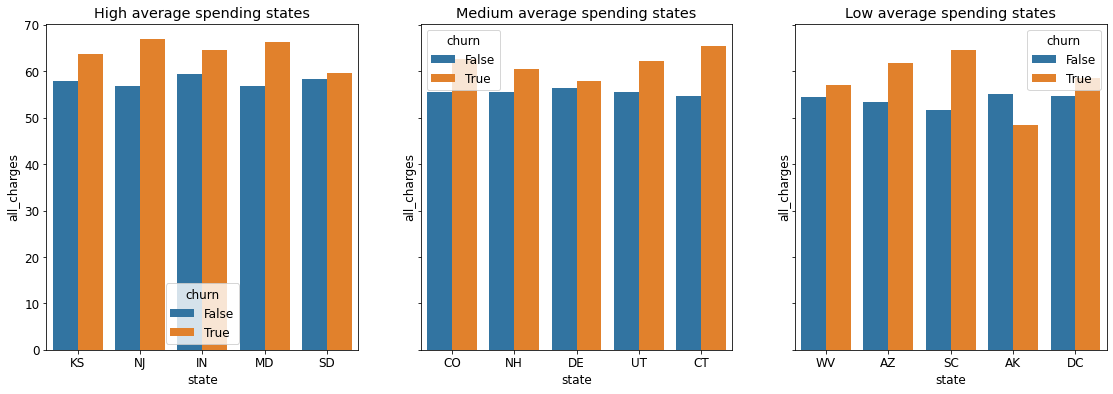

In [29]:
# average charges incurred within the states in the high,mid and low spenders
my_dfs = [high_charge_states, mid_charge_states, low_charge_states]
titles = ['High','Medium','Low']
fig,ax = plt.subplots(ncols = 3, sharey=True, figsize = (19,6))
for i in range(3):
    
    sns.barplot(x='state',y ='all_charges',hue ='churn',ax = ax[i], data = my_dfs[i], ci=None)
    #sns.histplot(x = 'all_charges', hue='churn', multiple="dodge", 
                  #stat = 'density', shrink = 0.8, common_norm=False, ax = ax[i], data = my_dfs[i])
    ax[i].set_title('{} average spending states'.format(titles[i]))

#plt.savefig('states vs charges')
plt.show()

* It seems that in high and middle spending states,the most loyal customers(churn=False) were spending an average of 58. For those who were spending more,
there was a high probability of churning. Look for incentives to retain states
* In the mid and low spending states, the average spending per state was around 55, an increase after that led to churning
* However, there is Arkansas where those spending more were more likely to be loyal than those spending less. Thats a point of interest. Could it be because of other factors like having a voice mail plan?

#### Lets check the effect of overall voice mail plan on churning

In [30]:
# subdivide voice mail plan into the two groups(1,0)
voice_plan_yes = df[df['voice mail plan'] == 1]
voice_plan_no = df[df['voice mail plan'] == 0]

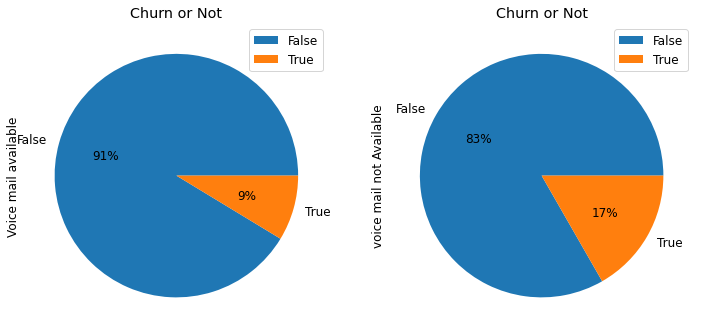

In [31]:
#rate of churning for voice mail plan=0 and voice mail plan = 1

fig, ax = plt.subplots(ncols = 2)

voice_plan_yes.groupby(['churn']).count().plot(kind='pie', y='voice mail plan',
                                               autopct='%1.0f%%',
                                                #colors = ['red', 'steelblue'],
                                                title='Churn or Not',
                                                ylabel ='Voice mail available',
                                                ax = ax[0])

voice_plan_no.groupby(['churn']).count().plot(kind='pie', y='voice mail plan',
                                               autopct='%1.0f%%',
                                                #colors = ['red', 'steelblue'],
                                                title='Churn or Not',
                                                ylabel ='voice mail not Available',
                                                ax = ax[1])
#plt.savefig('voice plan vs churning')
plt.show()

* Those who didn't have voice mail plan were more likely to churn than those who didn't have(17% vs 9% for those who had a voice mail plan)

#### Lets now checking for distribution of voice mail plan in the High,Low and middle spenders

In [32]:
for item in my_dfs:
    
    print(item['voice mail plan'].value_counts(normalize=True))

0    0.719764
1    0.280236
Name: voice mail plan, dtype: float64
0    0.723404
1    0.276596
Name: voice mail plan, dtype: float64
0    0.702381
1    0.297619
Name: voice mail plan, dtype: float64


* There were more people with a voice mail plan in the lower spending states

In [33]:
#Lets check if loyalty of AK (Arkansas) was due to many people there having a voice mail plan

<AxesSubplot:xlabel='state', ylabel='count'>

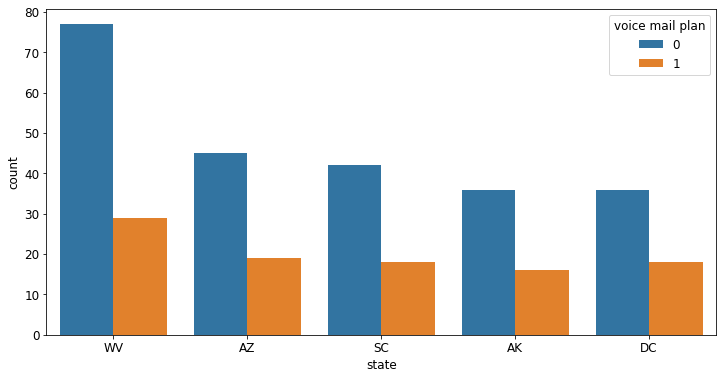

In [34]:
sns.countplot(x='state',hue ='voice mail plan', data = low_charge_states)

* It seems that having a voice mail plan was not the reason for the peoples loyalty in Arkansas as can be seen that there are many people who dont have voice mail, just like other states

#### Let us now examine the international plans and it's constituents

In [35]:
# Number of people with international plans
df['international plan'].value_counts()

0    3010
1     323
Name: international plan, dtype: int64

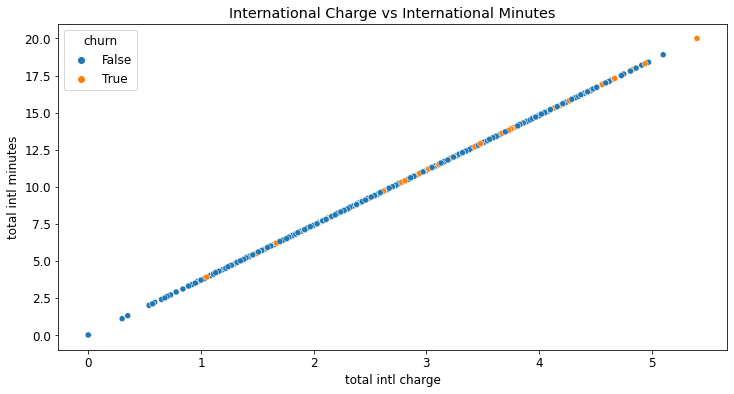

In [36]:
# total international minutes vs international charge

sns.scatterplot(x = 'total intl charge', y= 'total intl minutes',hue = 'churn', data = df)
plt.title('International Charge vs International Minutes')
plt.show()

* There is a linear relationship

#### How about among the area codes?



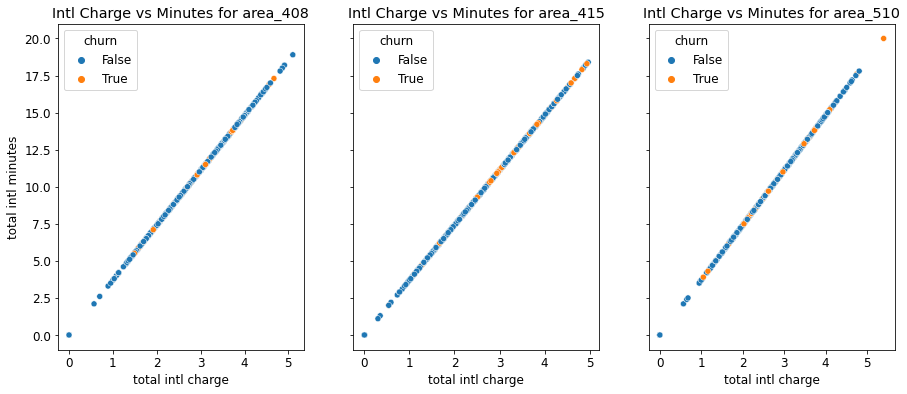

In [37]:
# international charges vs intenational minutes in the different area vodes
fig, ax = plt.subplots(ncols = 3, figsize = (15,6),sharey=True)
areas = ['area_408', 'area_415', 'area_510']
the_dfs = [area_408, area_415, area_510]
for idx, val in enumerate(the_dfs):
    sns.scatterplot(x= 'total intl charge', y ='total intl minutes', hue ='churn', ax = ax[idx], data = val )
    ax[idx].set_title('Intl Charge vs Minutes for {}'.format(areas[idx]))
plt.show()

* Still very linearly correlated

#### top 5 states in total international minutes?


In [38]:
#top 5 states in amount of  international minutes
df.groupby('state')['total intl minutes'].mean().sort_values(ascending = False)[:5]

state
MD    10.901429
KS    10.845714
NJ    10.808824
MS    10.684615
KY    10.654237
Name: total intl minutes, dtype: float64

In [39]:
# top 5 states in the amount spent on normal calls(high_charge_states)
high_charge_states.state.value_counts()

IN    71
KS    70
MD    70
NJ    68
SD    60
Name: state, dtype: int64

* Most of the states where people were spending alot on normal calls also appear in states with the highest international minutes(MD,KS,NJ).
International charges were double the cost of the normal calls which translates to more money for the company. Thus the
company should look into incentives to retain a stronghold in these states

#### Effect of customer service calls

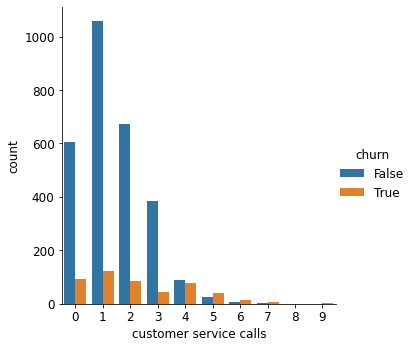

In [40]:
#effect of customer service on overall data
sns.catplot(x ='customer service calls', hue='churn', kind='count', data=df)
plt.show()

* All along, there are people who churn, but it is evident that from 4 calls onwards, most people churned, maybe out of frustration

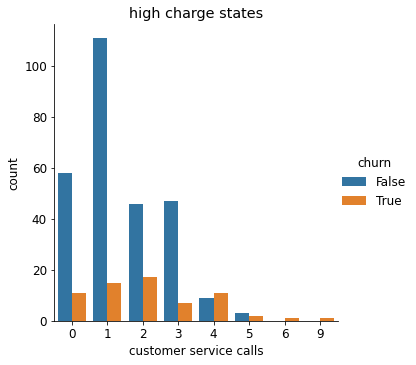

In [41]:
# customer service effect in high spending states
sns.catplot(x ='customer service calls', hue='churn', kind='count', \
            data=high_charge_states,ci=None)

plt.title('high charge states')
#plt.savefig('customer service-high end')
plt.show()

* In the states with high spending, even as low as 2 calls is causing a lot of people to churn. So lots of good customer service and solution based strategies are needed here

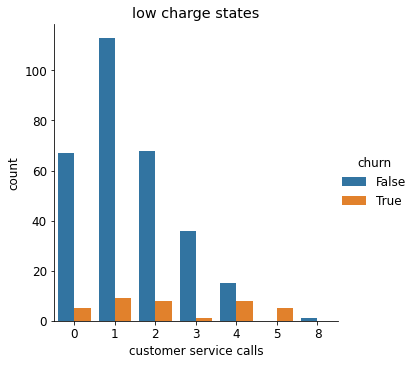

In [42]:
#customer service calls effect in low spending states
sns.catplot(x='customer service calls', hue='churn', kind='count', data=low_charge_states, ci=None)
plt.title('low charge states')
#plt.savefig('customer service-low end')
plt.show()

* The numbers for the low spending states are however lower and can mostly be seen after 4 calls

<AxesSubplot:>

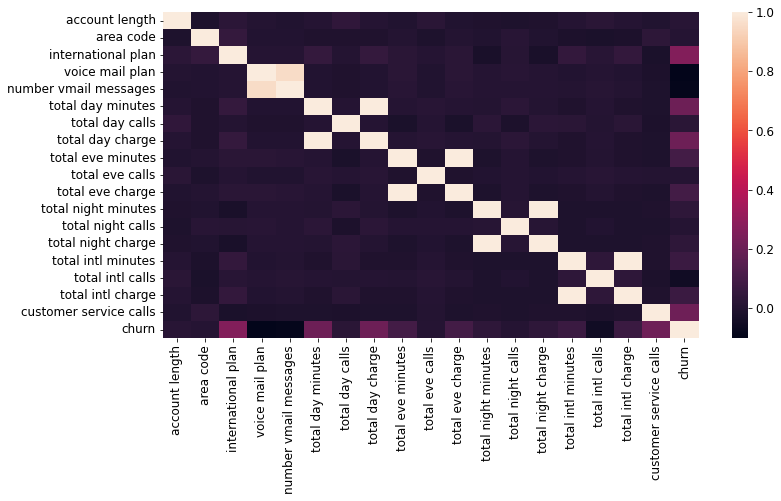

In [43]:
sns.heatmap(data.corr())

* Apart from the normal correlations like the total call minutes with the total charges, there isn't really any other correlation between features